<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [141]:
df = pd.read_csv('/Users/vineethravella/Desktop/mdst_tutorials_W22/data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [142]:
df.describe()
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **<Math for 8 grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [143]:
len(df['YEAR'].unique())

33

Looks like there are 33 different years of data

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [144]:
# Michigan Score
mi_score = df[df['STATE']=='MICHIGAN']['AVG_MATH_8_SCORE'].mean()
# Ohio Score
oh_score = df[df['STATE']=='OHIO']['AVG_MATH_8_SCORE'].mean()
print(mi_score)
print(oh_score)

276.1666666666667
282.25


Looks like Ohio has the higher average math score for 8th grade over all the years.

Find the average for your outcome score across all states in 2019

In [145]:
avg_2019 = df[df['YEAR']==2019]['AVG_MATH_8_SCORE'].mean()
print(avg_2019)

281.2641509433962


Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [146]:
df.groupby('STATE')['AVG_MATH_8_SCORE'].max().reset_index().sort_values(by='AVG_MATH_8_SCORE', ascending=False)

,STATE,AVG_MATH_8_SCORE
22,MASSACHUSETTS,301.0
32,NEW_JERSEY,296.0
31,NEW_HAMPSHIRE,296.0
47,VERMONT,295.0
24,MINNESOTA,295.0
36,NORTH_DAKOTA,293.0
9,DODEA,293.0
27,MONTANA,293.0
5,COLORADO,292.0
43,SOUTH_DAKOTA,291.0


<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [147]:
df.columns
# Drop PRIMARY_KEY, FEDERAL_REVENUE, STATE_REVENUE, LOCAL_REVENUE, INSTRUCTION_EXPENDITURE, SUPPORT_SERVICES_EXPENDITURE,
# OTHER_EXPENDITURE, GRADES_8_G, GRADES_12_G, GRADES_1_8_G, GRADES_9_12_G, GRADES_ALL_G, AVG_READING_4_SCORE, AVG_READING_8_SCORE
df.drop(['PRIMARY_KEY', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE','GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G'], axis=1, inplace=True)
df.columns

Index(['STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE', 'TOTAL_EXPENDITURE',
       'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'AVG_MATH_4_SCORE',
       'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

Final feature list: **STATE, YEAR, ENROLL, TOTAL_REVENUE, TOTAL_EXPENDITURE, GRADES_PK_G, GRADES_KG_G, GRADES_4_G, AVG_MATH_4_SCORE, AVG_MATH_8_SCORE, AVG_READING_4_SCORE, AVG_READING_8_SCORE**

Feature selection justification: **I decided to drop all revenue and expenditure related columns except totals because all the other columns are combinations of those. Additionally, I dropped the primary key because we don't need that. I also dropped columns for grades in the 8th grade or above becuase it doesn't make sense to leave those in if I'm trying to predict 8th grade score.**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

<AxesSubplot:xlabel='AVG_READING_8_SCORE', ylabel='AVG_MATH_8_SCORE'>

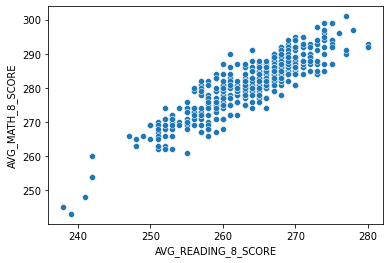

In [148]:
sns.scatterplot(x='AVG_READING_8_SCORE', y='AVG_MATH_8_SCORE', data=df)

**Average 8th grade reading scores vs. Average 8th grade math scores**.
Looks like there's a strong positive linear relationship between 8th grade reading and math scores. This shows that students in the 8th grade that score high, tend to score high for both. Similar for lower scores.

**Visualization 2**

<AxesSubplot:xlabel='YEAR', ylabel='AVG_MATH_8_SCORE'>

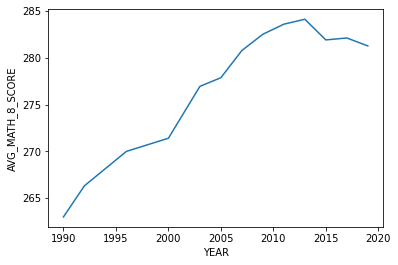

In [149]:
state_df = df.groupby('YEAR')['AVG_MATH_8_SCORE'].mean().reset_index().sort_values(by='AVG_MATH_8_SCORE', ascending=False)
sns.lineplot(x='YEAR', y='AVG_MATH_8_SCORE', data=state_df)

**Average 8th grade math score from 1990 to 2020.** This figure shows that there was an increase in 8th grade math score over time until about 2013, since which there has been a decline. There was a sharp increase in average 8th grade math scores after 2000 - maybe due to the internet growth.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
df.fillna(df.mean(),inplace=True)
df = pd.get_dummies(df)
X = df.drop('AVG_MATH_8_SCORE', axis=1, inplace=False)
y = df['AVG_MATH_8_SCORE']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=33, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **REGRESSION (Ridge)**

In [153]:
# import your sklearn class here
import sklearn.linear_model as lm

In [154]:
# create your model here
model = lm.Ridge(alpha=.5)

In [155]:
model.fit(X_train, y_train)

Ridge(alpha=0.5)

In [156]:
y_pred = model.predict(X_test)

In [157]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

ValueError: plot_confusion_matrix only supports classifiers

Text(0, 0.5, 'Average 8th grade reading score')

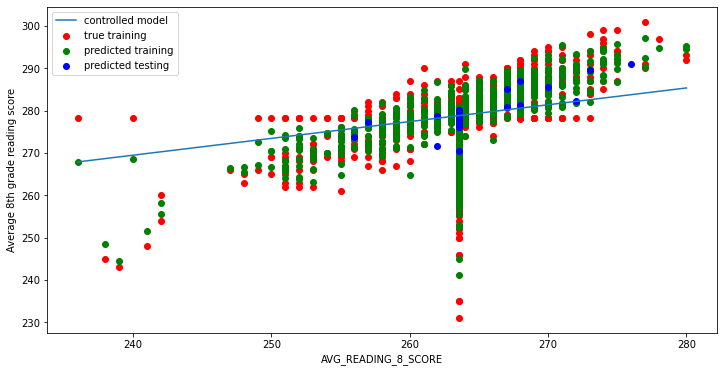

In [162]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'AVG_READING_8_SCORE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average 8th grade reading score')

<h2> Summary </h2>

**The goal of this checkpoint was to predict the average 8th grade math scores for students. The dataset contained information about state revenues, expenditures, and grades from Pre-K all the way to the 12th grade for math and readings. The features that I chose to include were total revenues and expenditures, and grades from Pre-K to the 8th grade. It didn't make sense to keep the other revenue and expenditure information because there was a total. I could've excluded the totals as well but I thought it would be interesting to see if total revenue or expenditure for a state in a given year affected how an 8th grade student performed in math. Additionally, the other grade columns past the 8th grade did not make sense to keep considering my predicted outcome. From exploration, I discovered that there was a positive linear relationship between 8th grade reading scores and 8th grade math scores. I also found that the average 8th grade math score increased over the years until 2013, when it dipped and continues to dip. For data processing, I filled all NaN values in the data with the mean and used pandas get dummies to convert categorical features. The final model used was a Ridge Regression due to its simplicity and ability to solve regression problems. The model seemed to predict 8th grade math scores lower than the true values, but seemed to be close enough to the real values. Given more time, I would've considered my feature selection more carefuly and applied better imputing methods for NaN values. Additionally, I wouldv'e tried out a couple different models to see which one worked best.**